In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset:
df=pd.read_csv('C:/Users/Azhar1/Documents/Python Scripts/Titanic_Train.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S
1,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
2,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S
3,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.0500,NaN,S
4,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S


In [4]:
df.shape

(218, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,218.000000,218.000000,218.000000,182.000000,218.000000,218.000000,218.000000
mean,782.500000,0.366972,2.311927,28.689121,0.490826,0.394495,34.571655
std,63.075352,0.483088,0.839105,14.140888,1.211469,0.837137,62.517561
min,674.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,728.250000,0.000000,2.000000,19.000000,0.000000,0.000000,7.895800
50%,782.500000,0.000000,3.000000,27.000000,0.000000,0.000000,13.000000
75%,836.750000,1.000000,3.000000,37.500000,1.000000,0.750000,31.206250
max,891.000000,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200


Observations:

1. Mean is more than Median in Survived, Age, SbSp, Parch and Fare columns.
2. There is large difference between 75% and max in Age, SibSp,Parch and Fare Columns.
3. Large difference indicates there are outliers in these columns.

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             36
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          165
Embarked         1
dtype: int64

In [4]:
# Filling null values

df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna(df['Cabin'].mode().values[0],inplace=True)
df['Embarked'].fillna(df['Embarked'].mode().values[0],inplace=True)

In [5]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  218 non-null    int64  
 1   Survived     218 non-null    int64  
 2   Pclass       218 non-null    int64  
 3   Name         218 non-null    object 
 4   Sex          218 non-null    object 
 5   Age          218 non-null    float64
 6   SibSp        218 non-null    int64  
 7   Parch        218 non-null    int64  
 8   Ticket       218 non-null    object 
 9   Fare         218 non-null    float64
 10  Cabin        218 non-null    object 
 11  Embarked     218 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.6+ KB


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,674,1,2,"Wilhelms, Mr. Charles",male,31.000000,0,0,244270,13.0000,B20,S
1,675,0,2,"Watson, Mr. Ennis Hastings",male,28.689121,0,0,239856,0.0000,B20,S
2,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.000000,0,0,349912,7.7750,B20,S
3,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.500000,0,0,342826,8.0500,B20,S
4,678,1,3,"Turja, Miss. Anna Sofia",female,18.000000,0,0,4138,9.8417,B20,S


In [8]:
# Dropping Name, Ticket & Cabin columns as our ML model doesn't require them

df=df.drop(columns=['Name'],axis=1)
df=df.drop(columns=['Ticket'],axis=1)
df=df.drop(columns=['Cabin'],axis=1)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,674,1,2,male,31.000000,0,0,13.0000,S
1,675,0,2,male,28.689121,0,0,0.0000,S
2,676,0,3,male,18.000000,0,0,7.7750,S
3,677,0,3,male,24.500000,0,0,8.0500,S
4,678,1,3,female,18.000000,0,0,9.8417,S


In [10]:
# Encoding the columns

from sklearn.preprocessing import LabelEncoder

In [11]:
LE=LabelEncoder()
df['Sex']=LE.fit_transform(df['Sex'])
df['Embarked']=LE.fit_transform(df['Embarked'])

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,674,1,2,1,31.000000,0,0,13.0000,2
1,675,0,2,1,28.689121,0,0,0.0000,2
2,676,0,3,1,18.000000,0,0,7.7750,2
3,677,0,3,1,24.500000,0,0,8.0500,2
4,678,1,3,0,18.000000,0,0,9.8417,2


In [13]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.012704,0.049368,-0.090035,-0.014491,0.046286,0.041106,-0.166544,-0.022895
Survived,-0.012704,1.000000,-0.431476,-0.525449,-0.064037,-0.065088,0.096179,0.347504,-0.191640
Pclass,0.049368,-0.431476,1.000000,0.206429,-0.319000,0.075360,0.047066,-0.480120,0.083567
Sex,-0.090035,-0.525449,0.206429,1.000000,-0.047283,-0.123479,-0.292605,-0.197218,0.108479
Age,-0.014491,-0.064037,-0.319000,-0.047283,1.000000,-0.147638,-0.066393,0.113583,0.100409
SibSp,0.046286,-0.065088,0.075360,-0.123479,-0.147638,1.000000,0.439802,0.115901,0.078108
Parch,0.041106,0.096179,0.047066,-0.292605,-0.066393,0.439802,1.000000,0.171867,-0.042975
Fare,-0.166544,0.347504,-0.480120,-0.197218,0.113583,0.115901,0.171867,1.000000,-0.235795
Embarked,-0.022895,-0.191640,0.083567,0.108479,0.100409,0.078108,-0.042975,-0.235795,1.000000


In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

# Data Visualization

<Axes: >

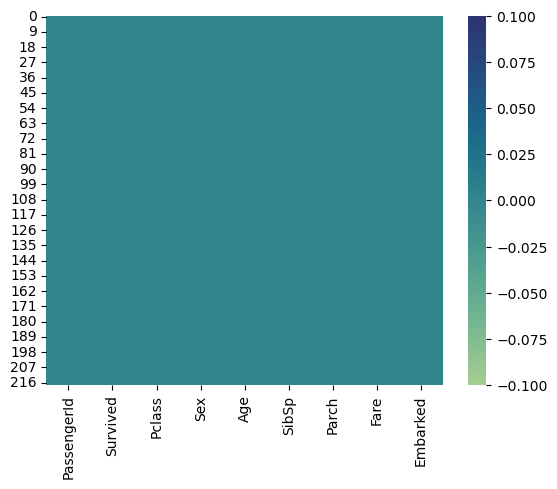

In [29]:
sns.heatmap(df.isnull(),cmap='crest')

3    121
1     53
2     44
Name: Pclass, dtype: int64


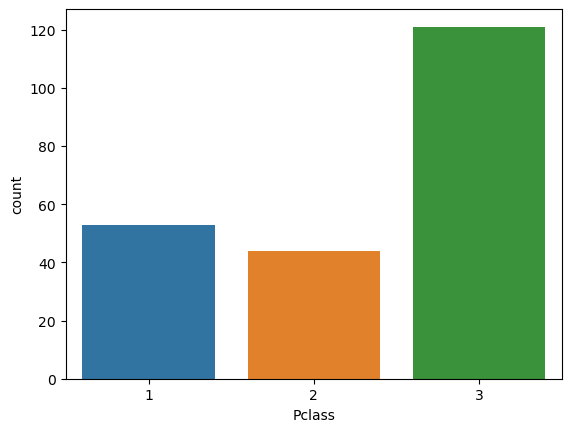

In [14]:
# Visualizing the count of Pclass
print(df['Pclass'].value_counts())
ax=sns.countplot(x='Pclass',data=df)
plt.show()

We can see that class 3 is boarded by most people followed by 1st Class.

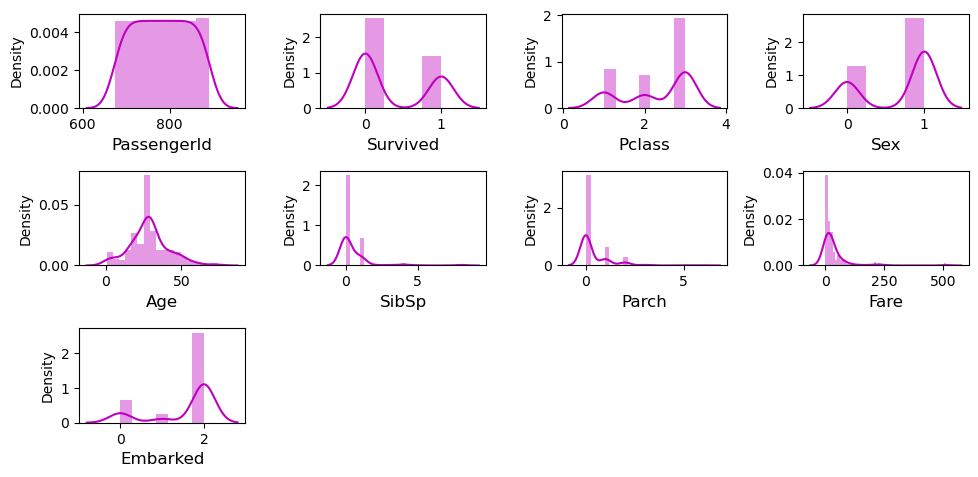

In [17]:
# Visualizing data distribution
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in df.columns:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()    

<Axes: xlabel='Pclass'>

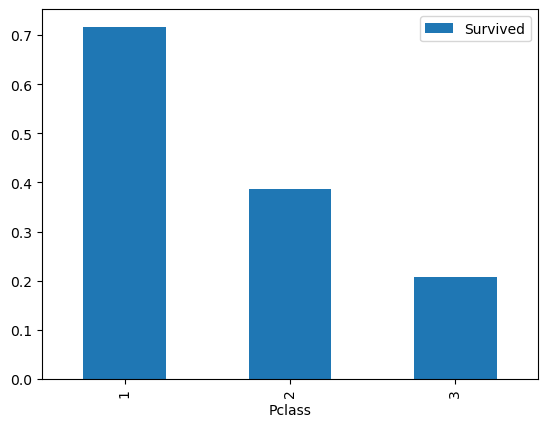

In [37]:
#Comparing Pclass and Survived

df[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

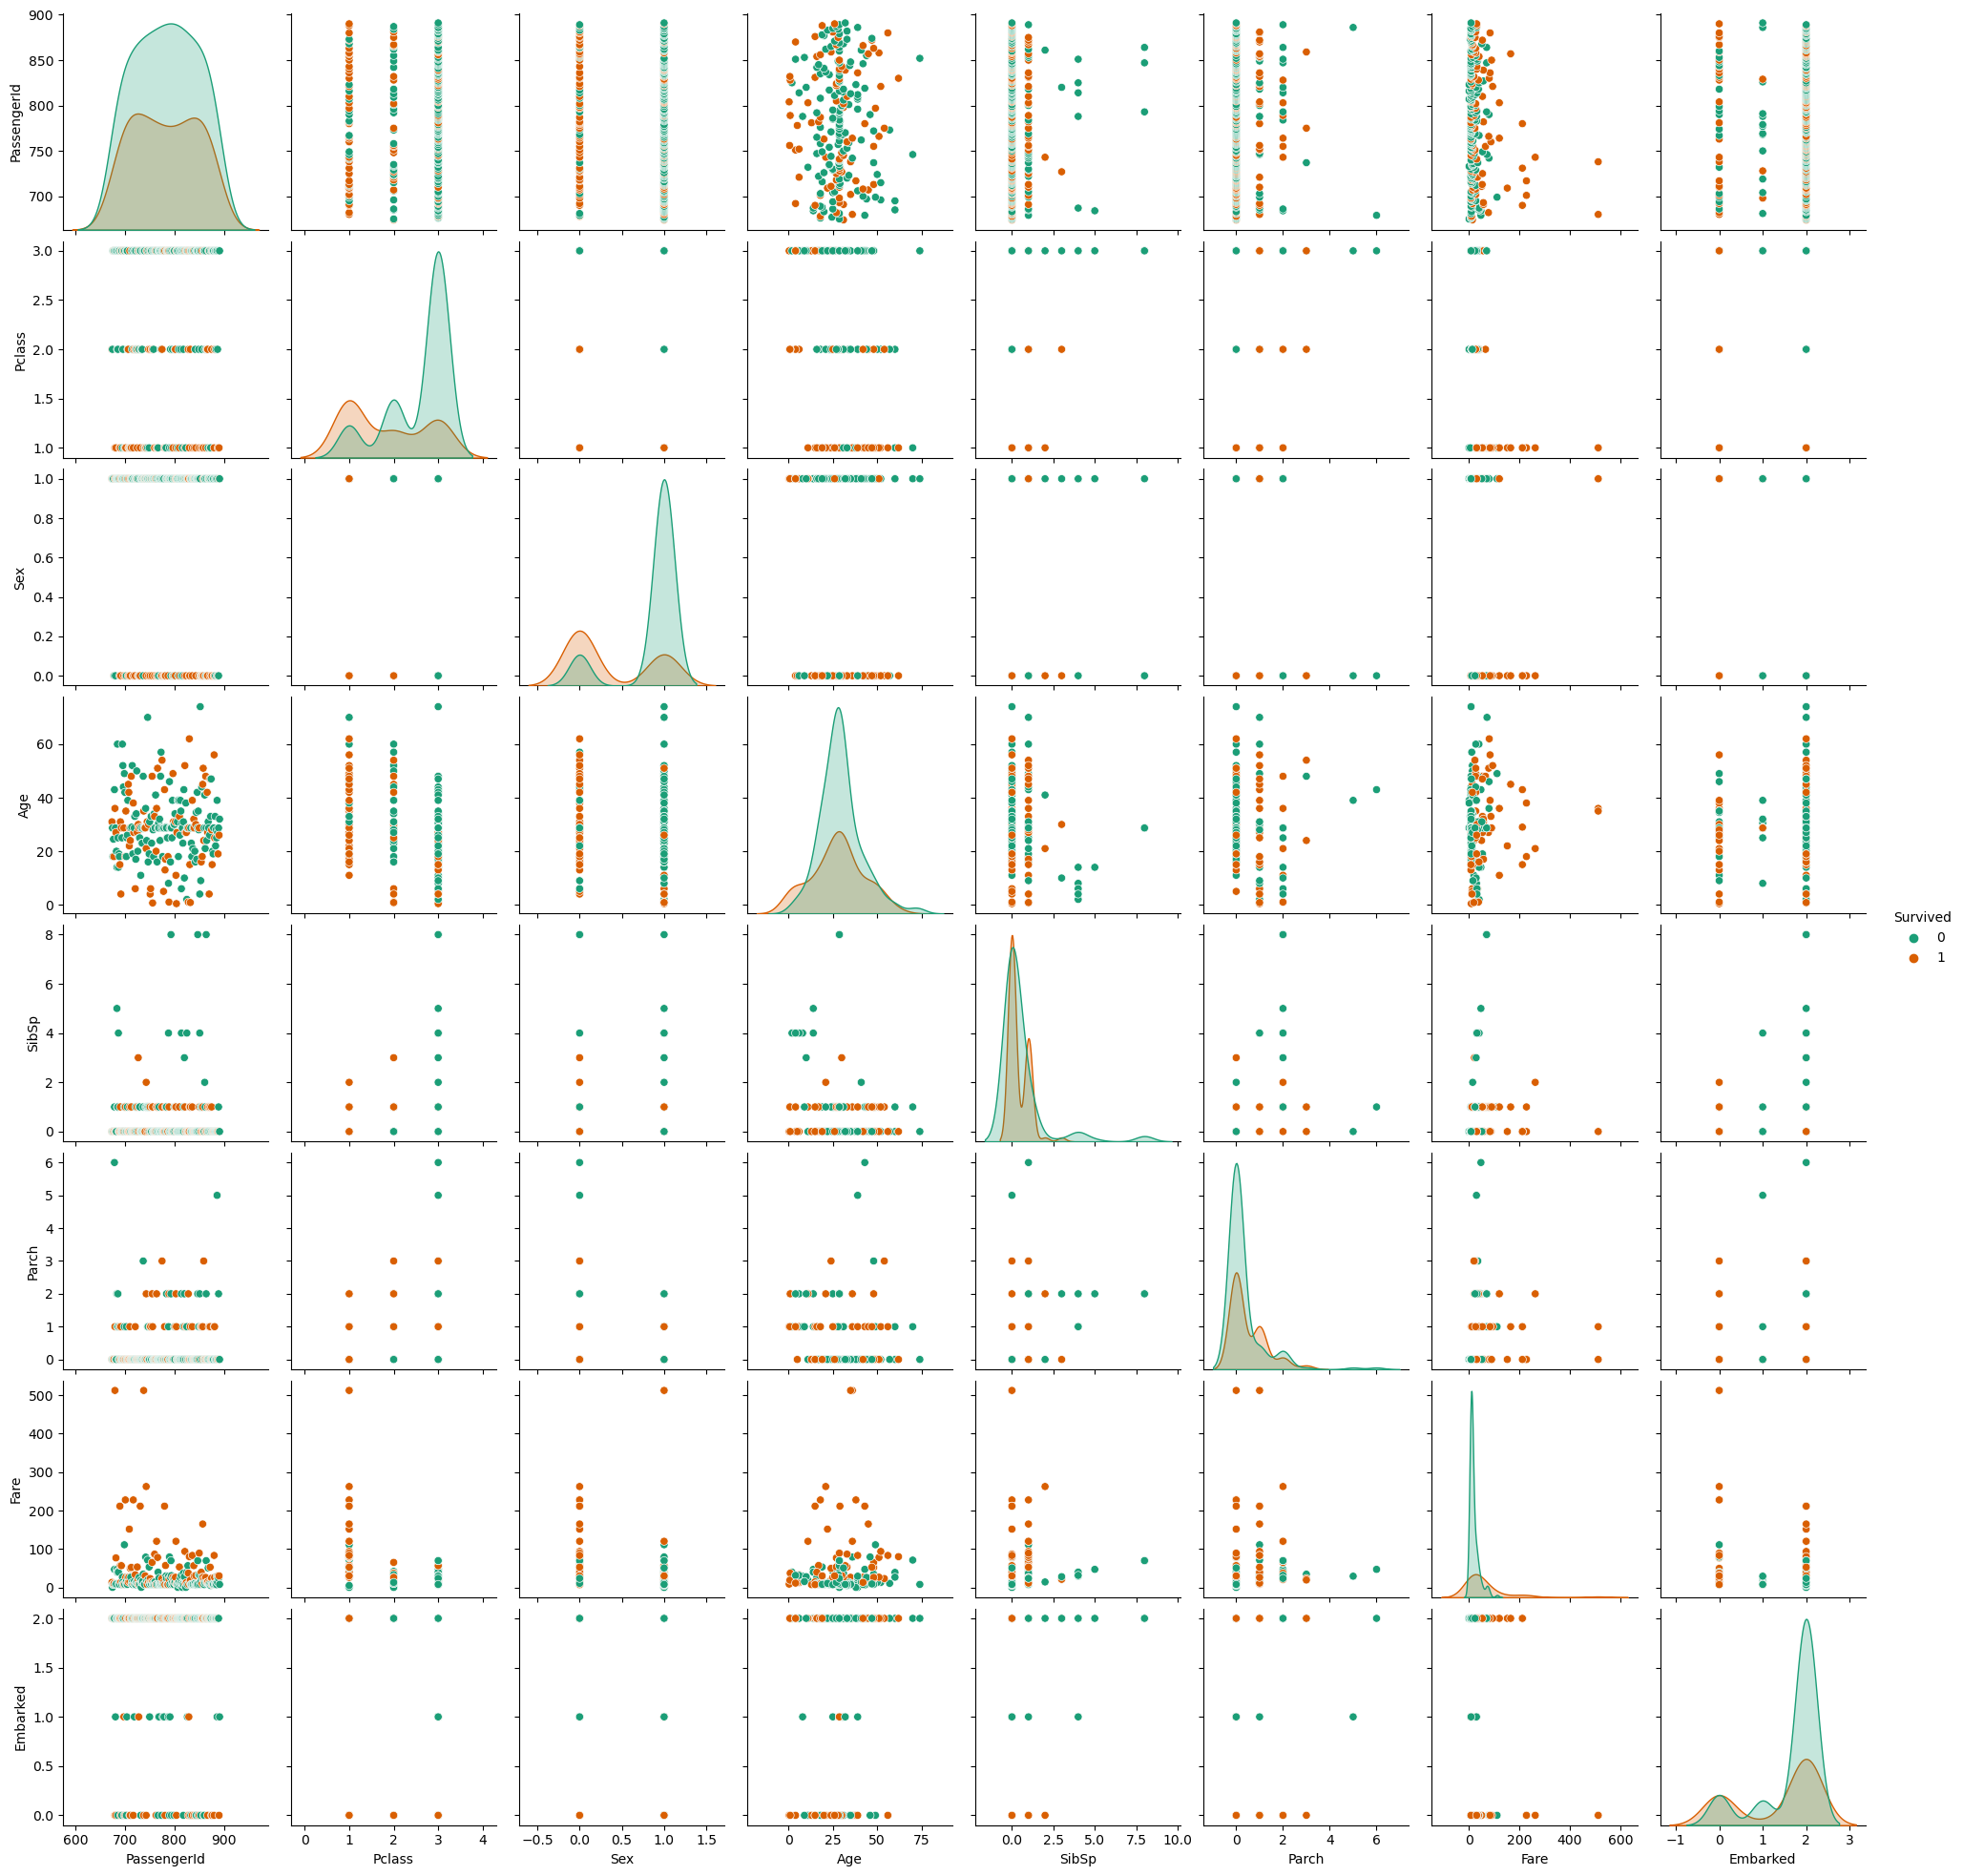

In [24]:
sns.pairplot(df,hue="Survived",palette='Dark2')
plt.show()

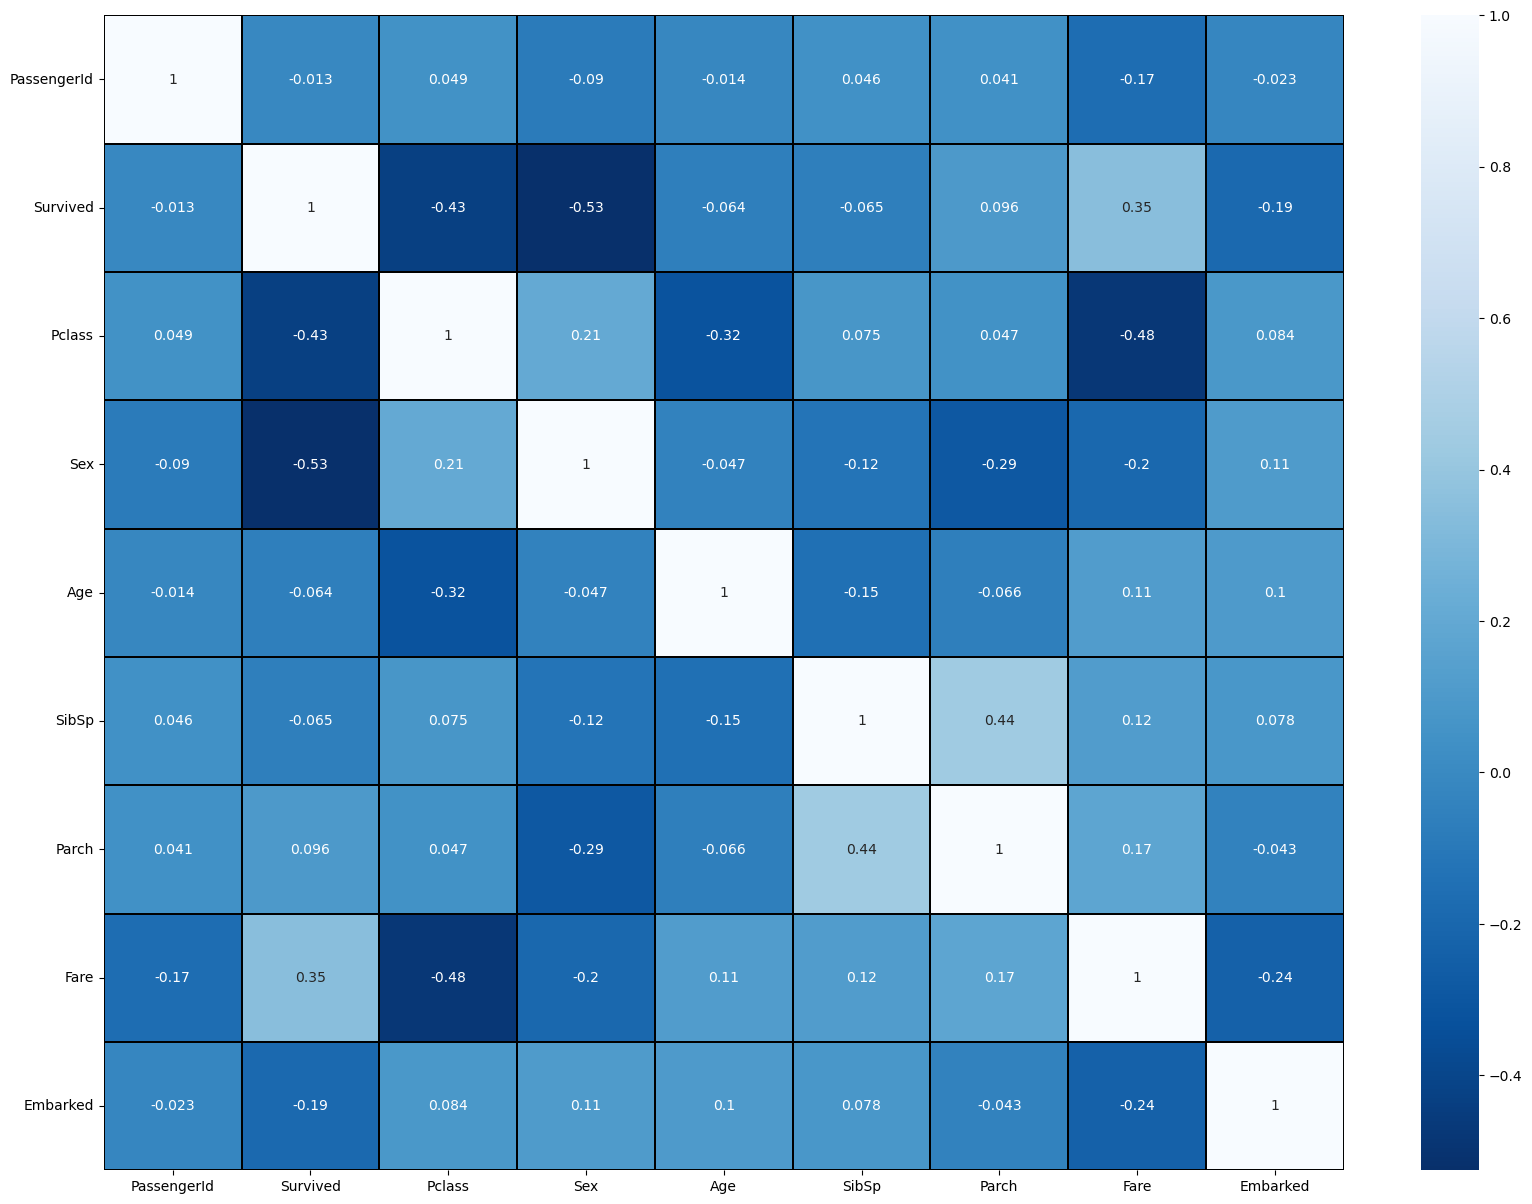

In [30]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,linecolor='black',annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [39]:
x=df[['Pclass','Sex','Age','Fare','Embarked']]

In [40]:
y=df[['Survived']]

In [41]:
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,150):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state= i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is ',maxAccu,'at random state ',maxRS)        

Best Accuracy is  0.9242424242424242 at random state  4


# Test & Training of Data

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [43]:
x

,Pclass,Sex,Age,Fare,Embarked
0,2,1,31.000000,13.0000,2
1,2,1,28.689121,0.0000,2
2,3,1,18.000000,7.7750,2
3,3,1,24.500000,8.0500,2
4,3,0,18.000000,9.8417,2
...,...,...,...,...,...
213,2,1,27.000000,13.0000,2
214,1,0,19.000000,30.0000,2
215,3,0,28.689121,23.4500,2
216,1,1,26.000000,30.0000,0


In [44]:
y

,Survived
0,1
1,0
2,0
3,0
4,1
...,...
213,0
214,1
215,0
216,1


# Using various models

In [45]:
# Using MNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.7424242424242424
[[30  6]
 [11 19]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        36
           1       0.76      0.63      0.69        30

    accuracy                           0.74        66
   macro avg       0.75      0.73      0.74        66
weighted avg       0.74      0.74      0.74        66



In [46]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.803030303030303
[[33  3]
 [10 20]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        36
           1       0.87      0.67      0.75        30

    accuracy                           0.80        66
   macro avg       0.82      0.79      0.80        66
weighted avg       0.81      0.80      0.80        66



In [47]:
# Using SVC model:

from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6363636363636364
[[33  3]
 [21  9]]
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        36
           1       0.75      0.30      0.43        30

    accuracy                           0.64        66
   macro avg       0.68      0.61      0.58        66
weighted avg       0.67      0.64      0.59        66



In [48]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6363636363636364
[[34  2]
 [22  8]]
              precision    recall  f1-score   support

           0       0.61      0.94      0.74        36
           1       0.80      0.27      0.40        30

    accuracy                           0.64        66
   macro avg       0.70      0.61      0.57        66
weighted avg       0.69      0.64      0.58        66



In [49]:
# Using KNN model:
# k =10

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6818181818181818
[[28  8]
 [13 17]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        36
           1       0.68      0.57      0.62        30

    accuracy                           0.68        66
   macro avg       0.68      0.67      0.67        66
weighted avg       0.68      0.68      0.68        66



In [50]:
# Using Decision Tree model:

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8484848484848485
[[31  5]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        36
           1       0.83      0.83      0.83        30

    accuracy                           0.85        66
   macro avg       0.85      0.85      0.85        66
weighted avg       0.85      0.85      0.85        66



In [54]:
# Using Random Forest classifier:

from sklearn.ensemble import RandomForestClassifier
RF=DecisionTreeClassifier()
RF.fit(x_train,y_train)
RF.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8484848484848485
[[31  5]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        36
           1       0.83      0.83      0.83        30

    accuracy                           0.85        66
   macro avg       0.85      0.85      0.85        66
weighted avg       0.85      0.85      0.85        66



In [55]:
# Comparing Accuracy scores of all models:

Accuracy=pd.DataFrame({'Model':['MNB',"Logistic Regression",'SVC-rbf','SVC-poly','KNN','Decision Tree','Random Forest Classifier'],'Accuracy':[0.7424,0.8030,0.6363,0.6363,0.6818,0.8484,0.8484]})
Accuracy

,Model,Accuracy
0,MNB,0.7424
1,Logistic Regression,0.8030
2,SVC-rbf,0.6363
3,SVC-poly,0.6363
4,KNN,0.6818
5,Decision Tree,0.8484
6,Random Forest Classifier,0.8484


In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
# Checking CV score for MNB
score=cross_val_score(mnb,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is ",accuracy_score(y_test,predmnb) - score.mean())

[0.72727273 0.75       0.70454545 0.72093023 0.62790698]
0.7061310782241014
Difference between Accuracy score and cross validation score is  0.03629316420014106


In [58]:
# Checking CV score for LG
score=cross_val_score(lg,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is ",accuracy_score(y_test,predmnb) - score.mean())

[0.79545455 0.86363636 0.75       0.79069767 0.8372093 ]
0.807399577167019
Difference between Accuracy score and cross validation score is  -0.06497533474277661


In [59]:
# Checking CV score for SVC
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is ",accuracy_score(y_test,predmnb) - score.mean())

[0.72727273 0.70454545 0.72727273 0.62790698 0.6744186 ]
0.6922832980972516
Difference between Accuracy score and cross validation score is  0.05014094432699079


In [60]:
# Checking CV score for KNN
score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is ",accuracy_score(y_test,predmnb) - score.mean())

[0.65909091 0.63636364 0.72727273 0.76744186 0.62790698]
0.683615221987315
Difference between Accuracy score and cross validation score is  0.058809020436927484


In [61]:
# Checking CV score for DTC
score=cross_val_score(dtc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is ",accuracy_score(y_test,predmnb) - score.mean())

[0.77272727 0.79545455 0.70454545 0.74418605 0.8372093 ]
0.7708245243128964
Difference between Accuracy score and cross validation score is  -0.028400281888653955


In [62]:
# Checking CV score for RandomForest
score=cross_val_score(RF,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is ",accuracy_score(y_test,predmnb) - score.mean())

[0.75       0.79545455 0.72727273 0.74418605 0.81395349]
0.7661733615221987
Difference between Accuracy score and cross validation score is  -0.023749119097956295


# Plotting ROC and compare AUC for all the model

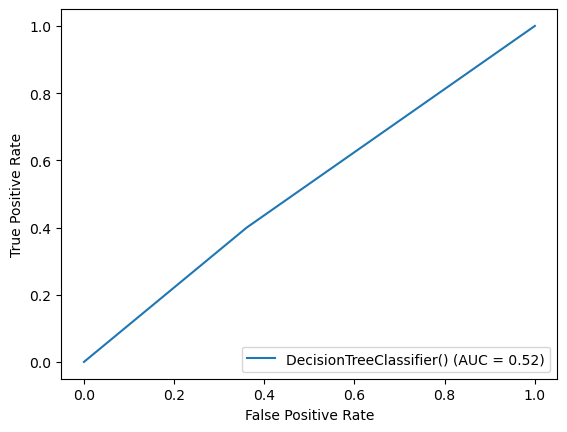

In [66]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=RF)
display.plot()

# Saving the model

In [67]:
import joblib
joblib.dump(RF,'Titanic_train_analysis.pkl')

['Titanic_train_analysis.pkl']

# Predicting the saved model

In [69]:
model=joblib.load('Titanic_train_analysis.pkl')

#Prediction
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)